In [1]:
import pandas as pd
import numpy as np

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

pd.set_option('display.max_rows', None)

import datetime

import matplotlib.pyplot as plt
import seaborn as sns


import plotly.graph_objects as go

import plotly.figure_factory as ff

from uszipcode import Zipcode
from uszipcode import SearchEngine

import addfips




In [2]:
df = pd.read_csv('bigtakeover_shows.csv')
df.head(5)

,Unnamed: 0,VENUE,CITY,PAY,ATTENDANCE,TIX,INFO,VENUE REVIEW
0,3/7/20,Beat Brewhall,"Cambridge, MA",$700.00,NaN,NaN,NaN,NaN
1,3/6/20,Beehive,Boston MA,$700.00,NaN,NaN,NaN,NaN
2,2/22/20,Froggy Masquerade,Kerhonkson NY,"$1,200.00",NaN,NaN,NaN,NaN
3,2/15/20,Colony,Woodstock NY,NaN,NaN,NaN,NaN,NaN
4,2/14/20,Flurry Festival,Saratoga Springs NY,"$1,200.00",NaN,NaN,NaN,NaN


In [3]:
df = df.drop(df.index[742])

In [4]:
df = df.rename(columns = {'Unnamed: 0':'DATE', 'TIX':'TICKETS', 'VENUE REVIEW': 'REVIEW'})

In [6]:
df.iloc[:,0] = df.iloc[:,0].str.replace('.', '/')

In [7]:
df['PAY'] = df['PAY'].replace({'\$': '', ',': '', '\.00':''}, regex=True)

In [8]:


venues = df['VENUE'].unique()

for i in range(len(df['VENUE'])):
    
    matches = process.extract(df['VENUE'][i], venues, scorer=fuzz.token_sort_ratio)
    
#    print([match for match in matches if match[1] > 90])
    

In [9]:
df['VENUE'] = df['VENUE'].replace('Beat Brewhall', 'Beat Brew Hall')
df['VENUE'] = df['VENUE'].replace('Waterhole ', 'Waterhole')
df['VENUE'] = df['VENUE'].replace('Putnam Place ', 'Putnam Place')
df['VENUE'] = df['VENUE'].replace('Bside Ballroom', 'BSide Ballroom')
df['VENUE'] = df['VENUE'].replace('Private Event ', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Cisco Brewers ', 'Cisco Brewers')
df['VENUE'] = df['VENUE'].replace('Burlington Jazz Fest', 'Burlington Jazz Festival')
df['VENUE'] = df['VENUE'].replace('Lukins ', "Lukin's")
df['VENUE'] = df['VENUE'].replace('Rockwood music hall', 'Rockwood Music Hall')
df['VENUE'] = df['VENUE'].replace('The Haunt ', 'The Haunt')
df['VENUE'] = df['VENUE'].replace('Funk N Waffles', 'Funk n Waffles')
df['VENUE'] = df['VENUE'].replace('Funk n Waffles ', 'Funk n Waffles')
df['VENUE'] = df['VENUE'].replace('Club Helsinki ', 'Club Helsinki')
df['VENUE'] = df['VENUE'].replace('Nectars', "Nectar's")
df['VENUE'] = df['VENUE'].replace('Summer Hoot ', 'Summer Hoot')
df['VENUE'] = df['VENUE'].replace('Beasrville Theater', 'Bearsville Theater')
df['VENUE'] = df['VENUE'].replace('Clementine ', 'Clementine')
df['VENUE'] = df['VENUE'].replace('Firefly Feast ', 'Firefly Feast')
df['VENUE'] = df['VENUE'].replace('Fishkill Farm', 'Fishkill Farms')
df['VENUE'] = df['VENUE'].replace("Snug's Harbor", 'Snug Harbor')
df['VENUE'] = df['VENUE'].replace('Acoustic Café', 'Acoustic Cafe')
df['VENUE'] = df['VENUE'].replace('Snugs Harbor', 'Snug Harbor')
df['VENUE'] = df['VENUE'].replace('Bacchus ', 'Bacchus')
df['VENUE'] = df['VENUE'].replace('Colony Café ', 'Colony Cafe')
df['VENUE'] = df['VENUE'].replace('Oasis ', 'Oasis Cafe')
df['VENUE'] = df['VENUE'].replace('MOVE Fest', 'Move Fest')
df['VENUE'] = df['VENUE'].replace('Mikes Tavern', "Mike's Tavern")
df['VENUE'] = df['VENUE'].replace('The Red Square ', 'The Red Square')
df['VENUE'] = df['VENUE'].replace('Cyber Café West', 'Cyber West Cafe')
df['VENUE'] = df['VENUE'].replace('Oasis Café', 'Oasis Cafe')
                                  

In [10]:

df['VENUE'] = df['VENUE'].replace('Jeff Wedding', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Wedding (private)', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Ashley Wedding', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Cailean Wedding', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Rachel Colleit Wedding', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Heather Wedding', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Wedding', 'Private Event')
df['VENUE'] = df['VENUE'].replace('Colony', 'Colony Cafe')
df['VENUE'] = df['VENUE'].replace('Snugs', 'Snug Harbor')
df['VENUE'] = df['VENUE'].replace('Colony ', 'Colony Cafe')

In [ ]:


cities = df['CITY'].unique()

for i in range(len(df['CITY'])):
    
    matches = process.extract(df['CITY'][i], cities, scorer=fuzz.token_sort_ratio)
    
#    print([match for match in matches if match[1] > 90])
    

In [11]:
df['CITY'] = df['CITY'].replace('Omaha N#','Omaha, NE')
df['CITY'] = df['CITY'].replace('Harrisburgh, PA','Harrisburg, PA')
df['CITY'] = df['CITY'].replace('Kingston NY ','Kingston, NY')
df['CITY'] = df['CITY'].replace('Kingston,NY','Kingston, NY')
df['CITY'] = df['CITY'].replace('Kingson, NY','Kingston, NY')
df['CITY'] = df['CITY'].replace('New york NY','New York, NY')
df['CITY'] = df['CITY'].replace('Albany NY ','Albany, NY')
df['CITY'] = df['CITY'].replace('Beacon NY ','Beacon, NY')
df['CITY'] = df['CITY'].replace('Fiskill NY','Fishkill, NY')
df['CITY'] = df['CITY'].replace('NY. NY ','NYC, NY')
df['CITY'] = df['CITY'].replace('NY, NY ','NYC, NY')
df['CITY'] = df['CITY'].replace('High Falls NY ','High Falls, NY')
df['CITY'] = df['CITY'].replace('Beacon NY ','Beacon, NY')
df['CITY'] = df['CITY'].replace('Poughkeepsie','Poughkeepsie, NY')
df['CITY'] = df['CITY'].replace('Newpaltz, NY','New Paltz, NY')
df['CITY'] = df['CITY'].replace('Kerhonksen, NY','Kerhonkson, NY')
df['CITY'] = df['CITY'].replace('Shandanken, NY','Shandaken, NY')
df['CITY'] = df['CITY'].replace('Ashveille, NC','Asheville, NC')
df['CITY'] = df['CITY'].replace('Sugarloaf, VT','Carrabassett Valley, ME')




In [12]:
df[df['CITY'].isnull()]

,DATE,VENUE,CITY,PAY,ATTENDANCE,TICKETS,INFO,REVIEW
475,11/11/12,Benefit Show,NaN,BENEFIT,NaN,NaN,NaN,NaN
490,6/22/12,Private Event,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df['CITY'] = df['CITY'].fillna('Newpaltz, NY')

In [14]:

for i in range(len(df['CITY'])):
    
    if ',' in df['CITY'][i]:
        pass
    
    else:
        df['CITY'][i] = df['CITY'][i][:-3] + ', ' + df['CITY'][i][-2:]
        

In [15]:
df['CITY'] = df['CITY'].replace('Nantucket, Ma','Nantucket, MA')
df['CITY'] = df['CITY'].replace('Narrowsbiu, gh','Narrowsburgh, NY')
df['CITY'] = df['CITY'].replace('E. Dur, am','East Durham, NY')
df['CITY'] = df['CITY'].replace('Woodbridge , J','Woodbridge, NJ')
df['CITY'] = df['CITY'].replace('Washington D, C.','Washington, DC')
df['CITY'] = df['CITY'].replace('Newpal, z','New Paltz, NY')
df['CITY'] = df['CITY'].replace(', YC','New York City, NY')
df['CITY'] = df['CITY'].replace('Saranac L, ke','Saranac Lake, NY')
df['CITY'] = df['CITY'].replace('NY., NY','New York City, NY')
df['CITY'] = df['CITY'].replace('NY, NY','New York City, NY')
df['CITY'] = df['CITY'].replace('NYC, NY','New York City, NY')
df['CITY'] = df['CITY'].replace('Long Island C, ty','Long Island City, NY')
df['CITY'] = df['CITY'].replace(', NY','New York City, NY')
df['CITY'] = df['CITY'].replace(', Y','New York City, NY')
df['CITY'] = df['CITY'].replace('Rhineb, ck','Rhinebeck, NY')
df['CITY'] = df['CITY'].replace('West Bingham, on','West Binghamton, NY')
df['CITY'] = df['CITY'].replace('Lake Pla, id','Lake Placid, NY')
df['CITY'] = df['CITY'].replace('Midtown, NYC','New York City, NY')
df['CITY'] = df['CITY'].replace('West Do, er','West Dover, VT')
df['CITY'] = df['CITY'].replace('Poughkeep, ie','Poughkeepsie, NY')
df['CITY'] = df['CITY'].replace(', Y','New York City, NY')
df['CITY'] = df['CITY'].replace(', Y ','New York City, NY')
df['CITY'] = df['CITY'].replace('Newpal, z ','New Paltz, NY')
df['CITY'] = df['CITY'].replace('Woodbridge , J ','Woodbridge, NJ')

In [16]:
df['PAY_INFO'] = df['PAY'].str.extract('([A-Z]\w{0,}.*)', expand=True)

df['PAY'] = df['PAY'].str.replace('([A-Z]\w{0,}.*)', '')


In [17]:
df.head(5)

,DATE,VENUE,CITY,PAY,ATTENDANCE,TICKETS,INFO,REVIEW,PAY_INFO
0,3/7/20,Beat Brew Hall,"Cambridge, MA",700,NaN,NaN,NaN,NaN,NaN
1,3/6/20,Beehive,"Boston, MA",700,NaN,NaN,NaN,NaN,NaN
2,2/22/20,Froggy Masquerade,"Kerhonkson, NY",1200,NaN,NaN,NaN,NaN,NaN
3,2/15/20,Colony Cafe,"Woodstock, NY",NaN,NaN,NaN,NaN,NaN,NaN
4,2/14/20,Flurry Festival,"Saratoga Springs, NY",1200,NaN,NaN,NaN,NaN,NaN


In [18]:
df[df['PAY'].isnull()]

,DATE,VENUE,CITY,PAY,ATTENDANCE,TICKETS,INFO,REVIEW,PAY_INFO
3,2/15/20,Colony Cafe,"Woodstock, NY",NaN,NaN,NaN,NaN,NaN,NaN
45,7/6/19,Cold Spring Independence Celebration,"Cold Spring, NY",NaN,NaN,NaN,rained out,NaN,NaN
488,6/29/12,The Chance Theater,"Poughkeepsie, NY",NaN,NaN,NaN,Yellowman / Royal Khaoz,NaN,NaN
490,6/22/12,Private Event,"Newpaltz, NY",NaN,NaN,NaN,NaN,NaN,NaN
539,7/8/11,Sullivan Hall,"New York City, NY",NaN,80,NaN,with Lucid,NaN,NaN


In [19]:
df['PAY'] = df['PAY'].replace(r'^\s*$', np.nan, regex=True)

In [20]:
df['PAY'] = df['PAY'].fillna(0)

In [21]:
df['PAY'] = df['PAY'].astype('int64')

In [22]:
df['ATTENDANCE'] = df['ATTENDANCE'].replace({',': ''}, regex=True)

In [23]:
df['ATTENDANCE'] = df['ATTENDANCE'].fillna(0)

In [24]:
df['ATTENDANCE'] = df['ATTENDANCE'].astype('int64')

In [25]:
df.dtypes

DATE          object
VENUE         object
CITY          object
PAY            int64
ATTENDANCE     int64
TICKETS       object
INFO          object
REVIEW        object
PAY_INFO      object
dtype: object

In [26]:
# df = df.set_index('DATE')

In [27]:
# df.to_excel('bigtakeover.xlsx', index_label='DATE')

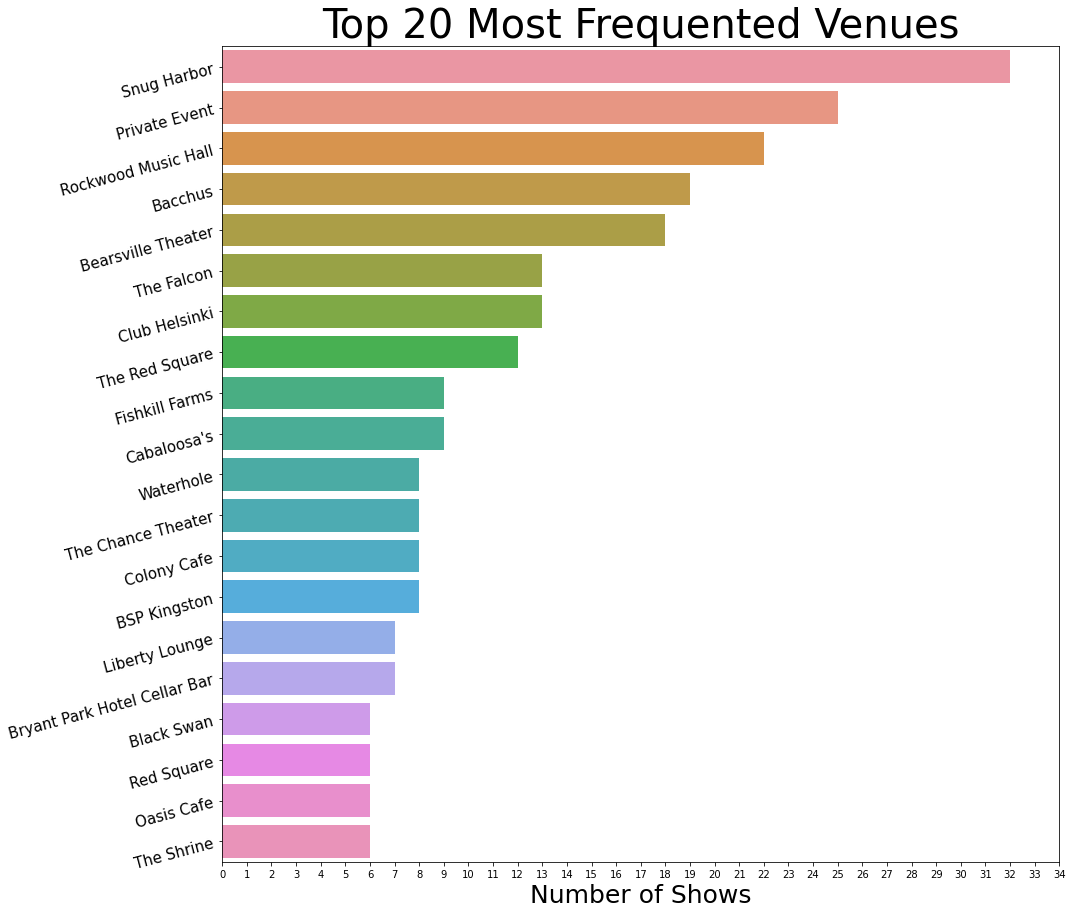

In [28]:

most_venue_df = df.groupby('VENUE').count().sort_values(by='DATE', ascending=False)
most_venue_df = most_venue_df[0:20]

fig, ax = plt.subplots(figsize=(15, 15))

sns.barplot(y = most_venue_df.index, x ='PAY', data = most_venue_df, orient='h')

plt.title('Top 20 Most Frequented Venues', fontsize=40)
plt.xlabel('Number of Shows', fontsize=25)
plt.ylabel('')

ax.set_yticklabels( most_venue_df.index)
plt.yticks( fontsize=15, rotation=15)
plt.xticks(np.arange(0, 35, 1))
plt.show()

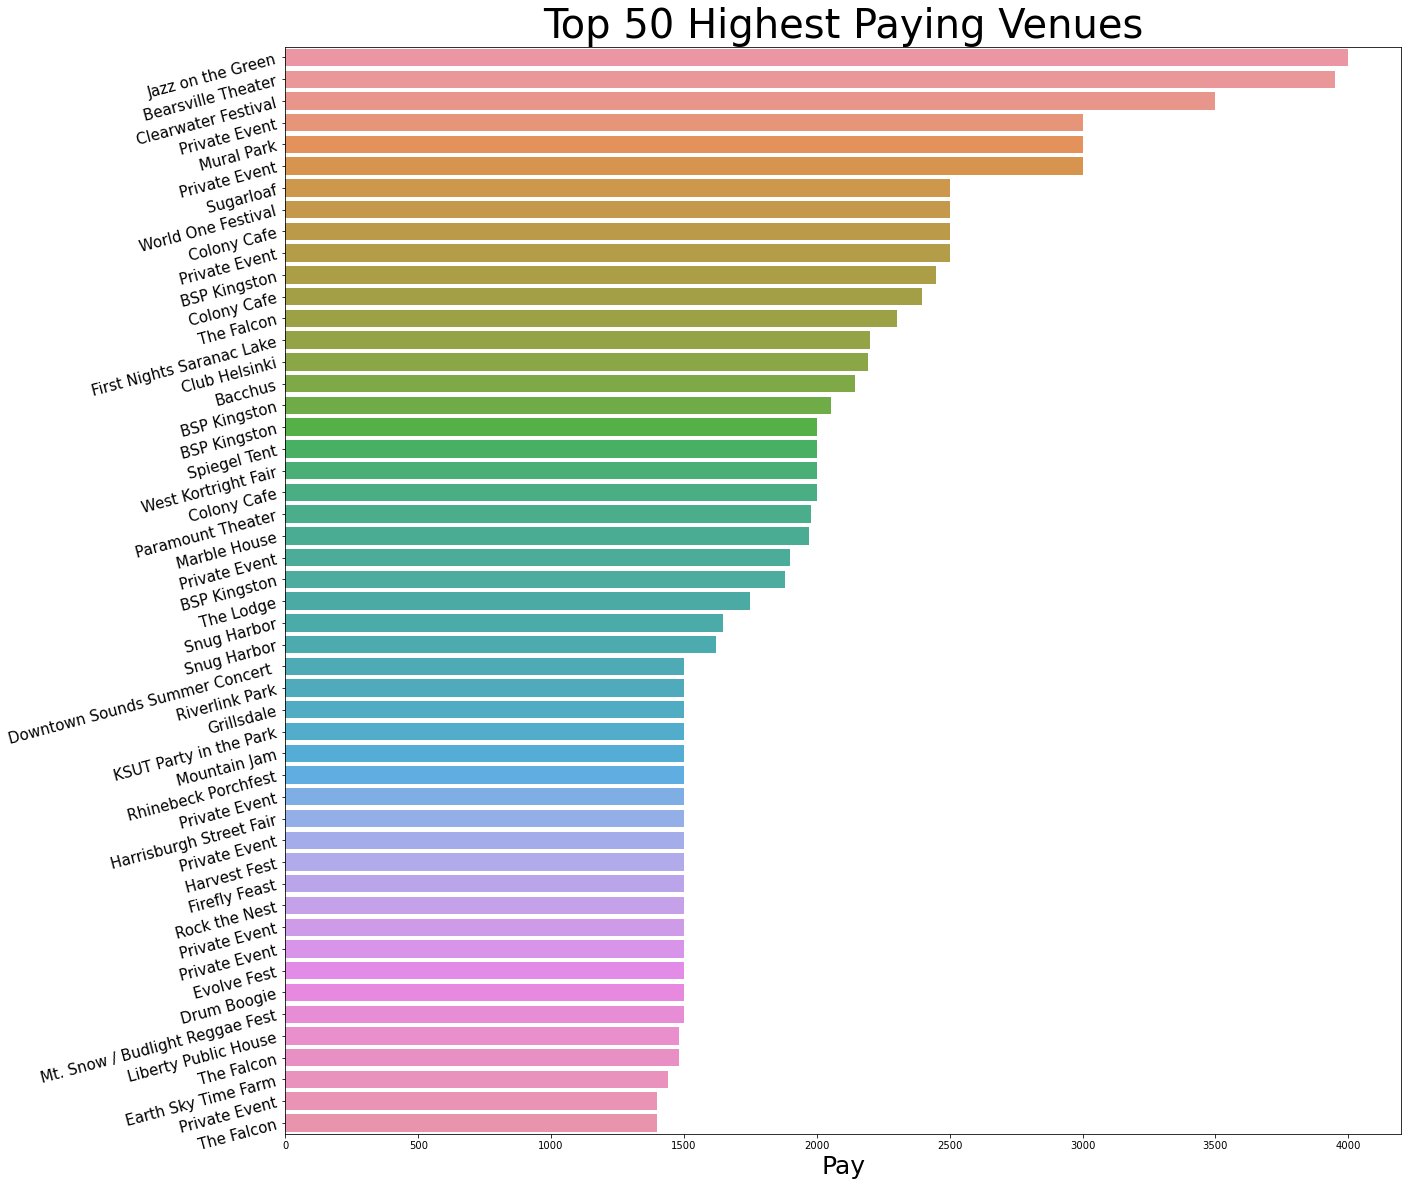

In [29]:

highest_pay_df = df.sort_values(by='PAY', ascending=False).reset_index(drop=True)
highest_pay_df = highest_pay_df[0:50]

fig, ax = plt.subplots(figsize=(20, 20))

sns.barplot(y = highest_pay_df.index, x ='PAY', data = highest_pay_df, orient='h')

plt.title('Top 50 Highest Paying Venues', fontsize=40)
plt.xlabel('Pay', fontsize=25)
plt.ylabel('')

ax.set_yticklabels( highest_pay_df['VENUE'])
plt.yticks( fontsize=15, rotation=15)

plt.show()

In [30]:
print('TOTAL PAY TO DATE:  $', df['PAY'].sum())

TOTAL PAY TO DATE:  $ 438813


In [31]:
print('TOTAL ATTENDANCE TO DATE: ', df['ATTENDANCE'].sum())

TOTAL ATTENDANCE TO DATE:  233372


# TOTAL PAY TO DATE:  $ 438,813

# TOTAL ATTENDANCE TO DATE:  233,372 people

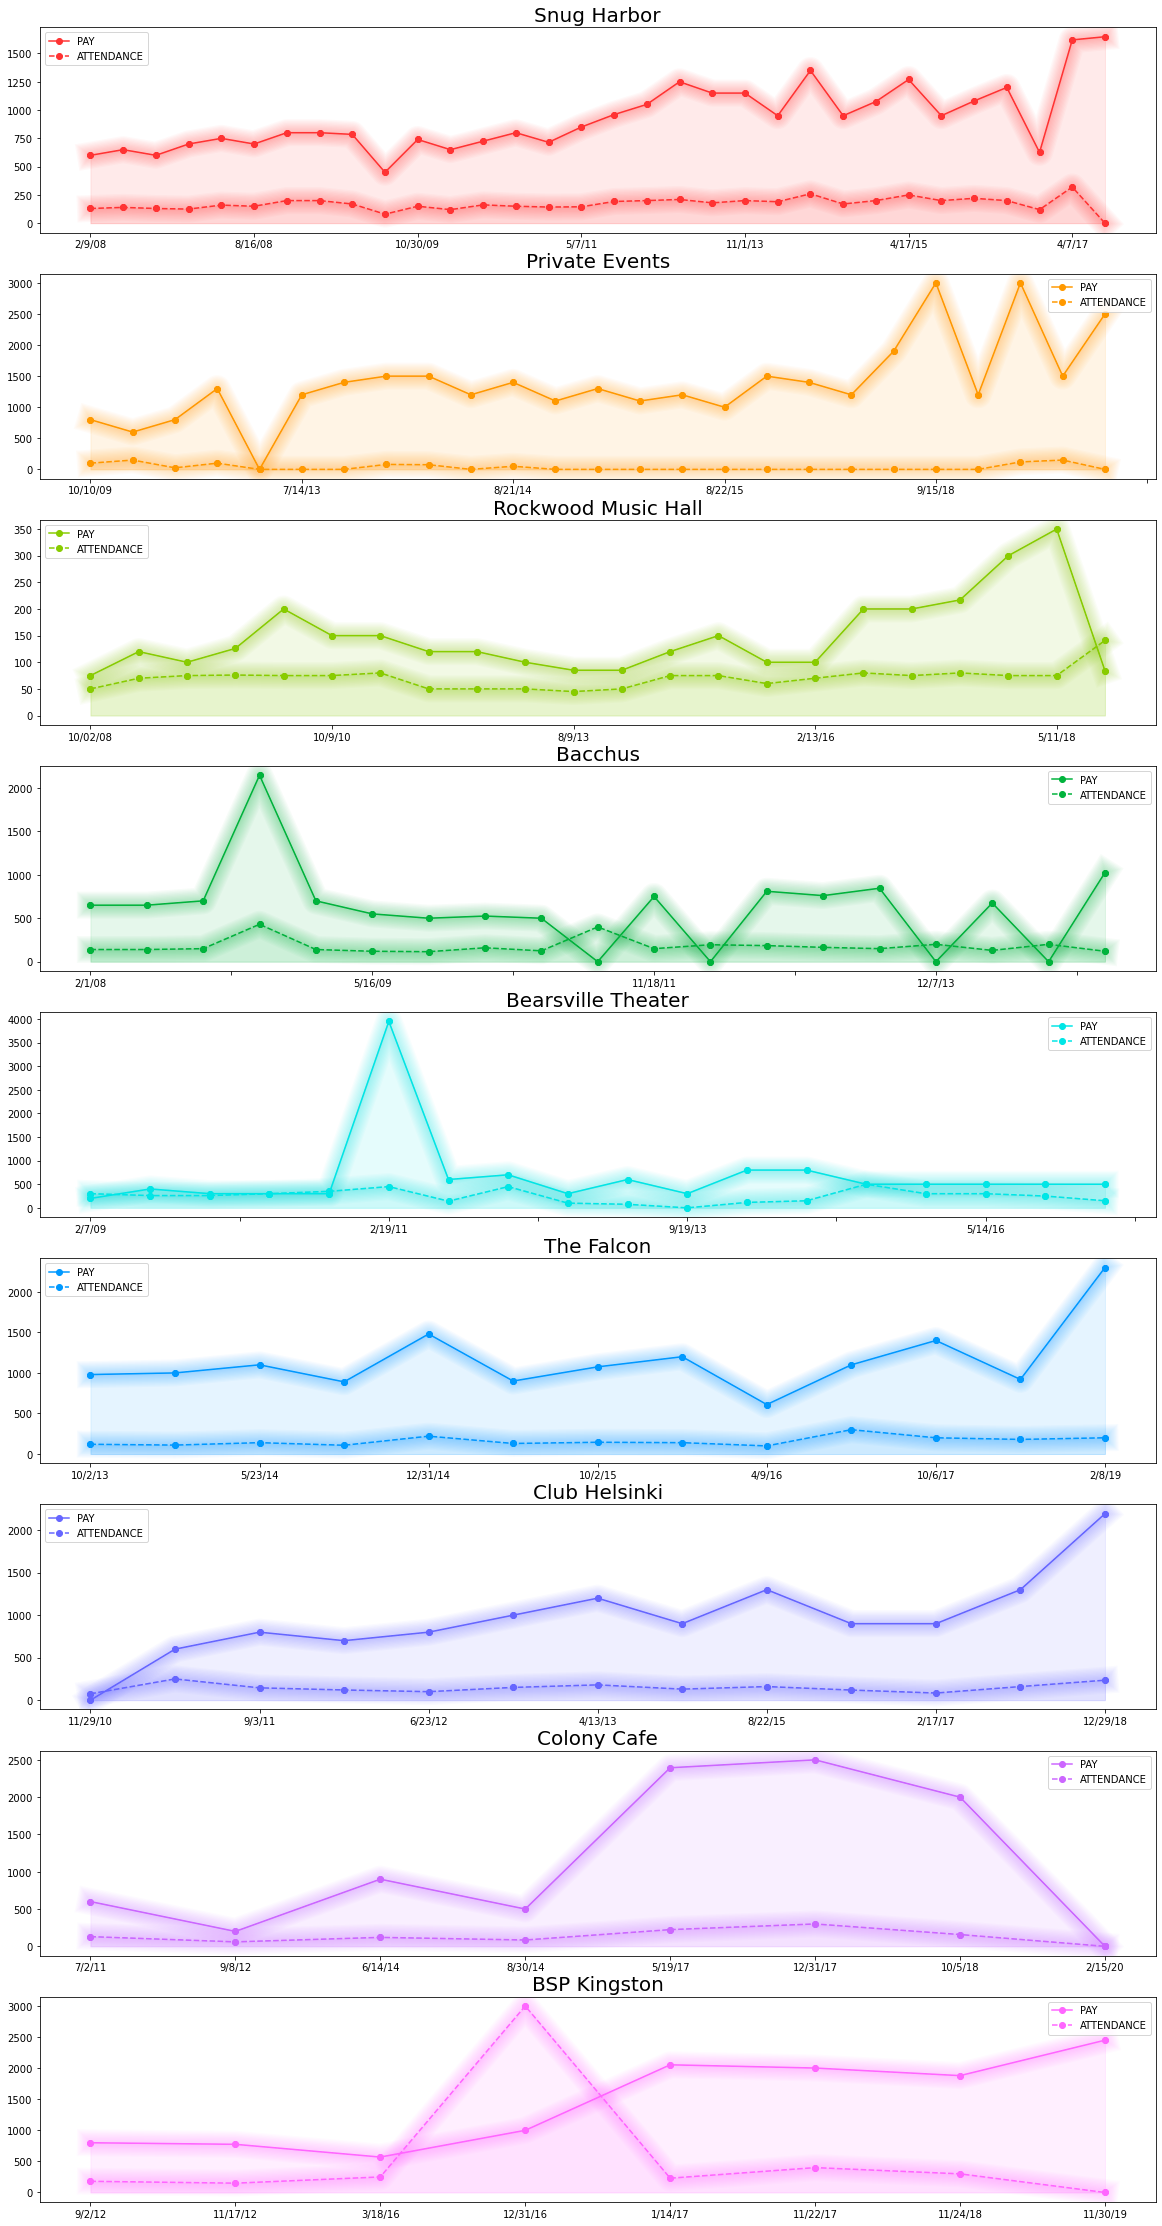

In [32]:

snugs = df.loc[df['VENUE'] == 'Snug Harbor']
snugs = snugs.iloc[::-1]
private = df.loc[df['VENUE'] == 'Private Event']
private = private.iloc[::-1]
rock = df.loc[df['VENUE']== 'Rockwood Music Hall']
rock = rock.iloc[::-1]
bacc = df.loc[df['VENUE'] == 'Bacchus']
bacc = bacc.iloc[::-1]
bear = df.loc[df['VENUE'] == 'Bearsville Theater']
bear = bear.iloc[::-1]
falcon = df.loc[df['VENUE'] == 'The Falcon']
falcon = falcon.iloc[::-1]
sinki = df.loc[df['VENUE']== 'Club Helsinki']
sinki = sinki.iloc[::-1]
colony = df.loc[df['VENUE']== 'Colony Cafe']
colony = colony.iloc[::-1]
bsp = df.loc[df['VENUE']== 'BSP Kingston']
bsp = bsp.iloc[::-1]



fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(ncols=1, nrows=9, sharey=False, sharex=False, figsize=(20,40))



n_shades = 10
diff_linewidth = 2.5
alpha_value = 0.3 / n_shades


snugs.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax1, color='#ff3333', legend=True)
snugs.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax1, color='#ff3333', legend=True, linestyle='--')

for n in range(1, n_shades+1):
    snugs.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax1, color='#ff3333')

ax1.fill_between(x=snugs.DATE, y1=snugs.PAY, y2=[0] * len(snugs), color='#ff3333', alpha=0.1)    
ax1.fill_between(x=snugs.DATE, y1=snugs.ATTENDANCE, y2=[0] * len(snugs), color='#ff3333', alpha=0.1) 

ax1.set_xlabel('') 
ax1.set_title('Snug Harbor', fontsize=20)


private.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax2, color='#ff9900', legend=True)
private.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax2, color='#ff9900', legend=True, linestyle='--')

for n in range(1, n_shades+1):
    private.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax2, color='#ff9900')  
    
ax2.fill_between(x=private.DATE, y1=private.PAY, y2=[0] * len(private), color='#ff9900', alpha=0.1)     
ax2.fill_between(x=private.DATE, y1=private.ATTENDANCE, y2=[0] * len(private), color='#ff9900', alpha=0.1) 

ax2.set_xlabel('')    
ax2.set_title('Private Events', fontsize=20)

rock.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax3, color='#88cc00', legend=True)
rock.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax3, color='#88cc00', legend=True, linestyle='--')

    
for n in range(1, n_shades+1):
    rock.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax3, color='#88cc00')
    
ax3.fill_between(x=rock.DATE, y1=rock.PAY, y2=[0] * len(rock), color='#88cc00', alpha=0.1)     
ax3.fill_between(x=rock.DATE, y1=rock.ATTENDANCE, y2=[0] * len(rock), color='#88cc00', alpha=0.1)     
    
ax3.set_xlabel('') 
ax3.set_title('Rockwood Music Hall', fontsize=20)

    
bacc.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax4, color='#00b33c', legend=True)
bacc.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax4, color='#00b33c', legend=True, linestyle='--')


for n in range(1, n_shades+1):
    bacc.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax4, color='#00b33c')

ax4.fill_between(x=bacc.DATE, y1=bacc.PAY, y2=[0] * len(bacc), color='#00b33c', alpha=0.1)     
ax4.fill_between(x=bacc.DATE, y1=bacc.ATTENDANCE, y2=[0] * len(bacc), color='#00b33c', alpha=0.1)     
    
ax4.set_xlabel('')    
ax4.set_title('Bacchus', fontsize=20)

   
bear.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax5, color='#00e6e6', legend=True)
bear.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax5, color='#00e6e6', legend=True, linestyle='--')

for n in range(1, n_shades+1):
    bear.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax5, color='#00e6e6')

ax5.fill_between(x=bear.DATE, y1=bear.PAY, y2=[0] * len(bear), color='#00e6e6', alpha=0.1)     
ax5.fill_between(x=bear.DATE, y1=bear.ATTENDANCE, y2=[0] * len(bear), color='#00e6e6', alpha=0.1)     
     
ax5.set_xlabel('') 
ax5.set_title('Bearsville Theater', fontsize=20)

  
falcon.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax6, color='#0099ff', legend=True)
falcon.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax6, color='#0099ff', legend=True, linestyle='--')

for n in range(1, n_shades+1):
    falcon.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax6, color='#0099ff')

ax6.fill_between(x=falcon.DATE, y1=falcon.PAY, y2=[0] * len(falcon), color='#0099ff', alpha=0.1)     
ax6.fill_between(x=falcon.DATE, y1=falcon.ATTENDANCE, y2=[0] * len(falcon), color='#0099ff', alpha=0.1)     
    
ax6.set_xlabel('')    
ax6.set_title('The Falcon', fontsize=20)

    
sinki.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax7, color='#6666ff', legend=True)
sinki.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax7, color='#6666ff', legend=True, linestyle='--')

for n in range(1, n_shades+1):
    sinki.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax7, color='#6666ff')

ax7.fill_between(x=sinki.DATE, y1=sinki.PAY, y2=[0] * len(sinki), color='#6666ff', alpha=0.1)     
ax7.fill_between(x=sinki.DATE, y1=sinki.ATTENDANCE, y2=[0] * len(sinki), color='#6666ff', alpha=0.1)     
     
ax7.set_xlabel('')    
ax7.set_title('Club Helsinki', fontsize=20)
   
    
colony.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax8, color='#cc66ff', legend=True)
colony.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax8, color='#cc66ff', legend=True, linestyle='--')


for n in range(1, n_shades+1):
    colony.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax8, color='#cc66ff')
    
ax8.fill_between(x=colony.DATE, y1=colony.PAY, y2=[0] * len(colony), color='#cc66ff', alpha=0.1)     
ax8.fill_between(x=colony.DATE, y1=colony.ATTENDANCE, y2=[0] * len(colony), color='#cc66ff', alpha=0.1)     

ax8.set_xlabel('')
ax8.set_title('Colony Cafe', fontsize=20)


bsp.reset_index(drop=True).plot(marker='o', x= 'DATE', y='PAY', ax=ax9, color='#ff66ff', legend=True)
bsp.reset_index(drop=True).plot(marker='o', x= 'DATE', y='ATTENDANCE', ax=ax9, color='#ff66ff', legend=True, linestyle='--')

for n in range(1, n_shades+1):
    bsp.reset_index(drop=True).plot(marker='o', linewidth=2+(diff_linewidth*n),
            alpha=alpha_value, legend=False, ax=ax9, color='#ff66ff')
    
ax9.fill_between(x=bsp.DATE, y1=bsp.PAY, y2=[0] * len(bsp), color='#ff66ff', alpha=0.1)     
ax9.fill_between(x=bsp.DATE, y1=bsp.ATTENDANCE, y2=[0] * len(bsp), color='#ff66ff', alpha=0.1)         

ax9.set_xlabel('')
ax9.set_title('BSP Kingston', fontsize=20)
    
    
plt.show()



In [33]:
df_2020 = df.iloc[0:11]
df_2019 = df.iloc[11:83]
df_2018 = df.iloc[83:161]
df_2017 = df.iloc[161:240]
df_2016 = df.iloc[240:301]
df_2015 = df.iloc[301:353]
df_2014 = df.iloc[353:408]
df_2013 = df.iloc[408:471]
df_2012 = df.iloc[471:509]
df_2011 = df.iloc[509:561]
df_2010 = df.iloc[561:626]
df_2009 = df.iloc[626:676]
df_2008 = df.iloc[676:742]

In [34]:
# number of shows per year

show_count_df = [df_2008.count()[0],
                df_2009.count()[0],
                df_2010.count()[0],
                df_2011.count()[0],
                df_2012.count()[0],
                df_2013.count()[0],
                df_2014.count()[0],
                df_2015.count()[0],
                df_2016.count()[0],
                df_2017.count()[0],
                df_2018.count()[0],
                df_2019.count()[0],
                df_2020.count()[0]]

show_count_df = pd.DataFrame(show_count_df, columns=['SHOWS'])

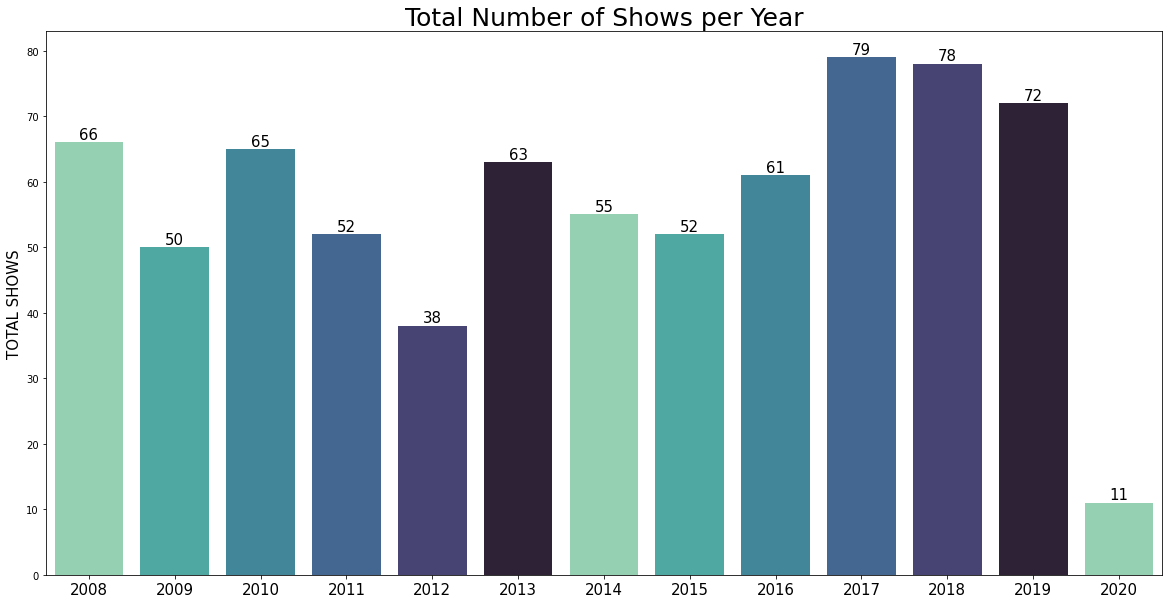

In [35]:
fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("mako_r")

g = sns.barplot(x=show_count_df.index ,y='SHOWS',data=show_count_df, palette=palette)

plt.xticks(ticks = np.arange(0,13, 1), labels = np.arange(2008, 2021, 1), fontsize=15)
plt.ylabel('TOTAL SHOWS',fontsize=15)
plt.title('Total Number of Shows per Year',fontsize=25)

for index, row in show_count_df.iterrows():
    g.text(row.name, row.SHOWS+0.5, row.SHOWS, color='black', ha="center", fontsize=15)


plt.show()

In [36]:
# total pay per year

pay_df = [df_2008['PAY'].sum(),
        df_2009['PAY'].sum(),
        df_2010['PAY'].sum(),
        df_2011['PAY'].sum(),
        df_2012['PAY'].sum(),
        df_2013['PAY'].sum(),
        df_2014['PAY'].sum(),
        df_2015['PAY'].sum(),
        df_2016['PAY'].sum(),
        df_2017['PAY'].sum(),
        df_2018['PAY'].sum(),
        df_2019['PAY'].sum(),
        df_2020['PAY'].sum()]

pay_df = pd.DataFrame(pay_df, columns=['PAY'])

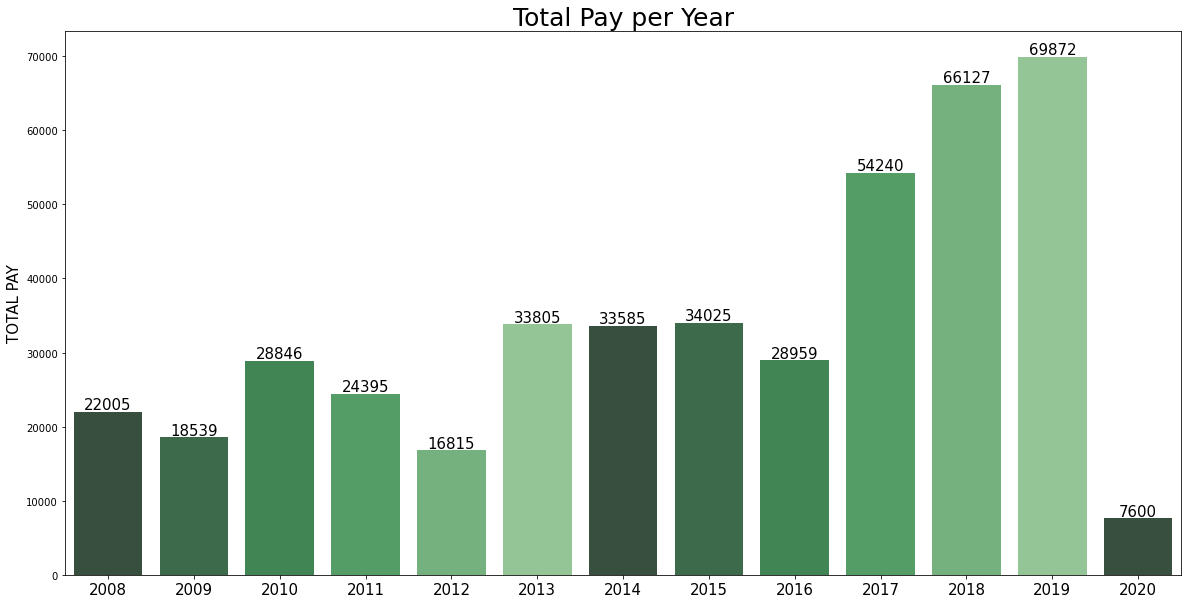

In [37]:
fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("Greens_d")

g = sns.barplot(x=pay_df.index ,y='PAY',data=pay_df, palette=palette)

plt.xticks(ticks = np.arange(0,13, 1), labels = np.arange(2008, 2021, 1), fontsize=15)
plt.ylabel('TOTAL PAY',fontsize=15)
plt.title('Total Pay per Year',fontsize=25)

for index, row in pay_df.iterrows():
    g.text(row.name, row.PAY+350, row.PAY, color='black', ha="center", fontsize=15)


plt.show()


In [38]:
# total attendance per year

attendance_df = [df_2008['ATTENDANCE'].sum(),
                df_2009['ATTENDANCE'].sum(),
                df_2010['ATTENDANCE'].sum(),
                df_2011['ATTENDANCE'].sum(),
                df_2012['ATTENDANCE'].sum(),
                df_2013['ATTENDANCE'].sum(),
                df_2014['ATTENDANCE'].sum(),
                df_2015['ATTENDANCE'].sum(),
                df_2016['ATTENDANCE'].sum(),
                df_2017['ATTENDANCE'].sum(),
                df_2018['ATTENDANCE'].sum(),
                df_2019['ATTENDANCE'].sum(),
                df_2020['ATTENDANCE'].sum()]


attendance_df = pd.DataFrame(attendance_df, columns=['ATTENDANCE'])

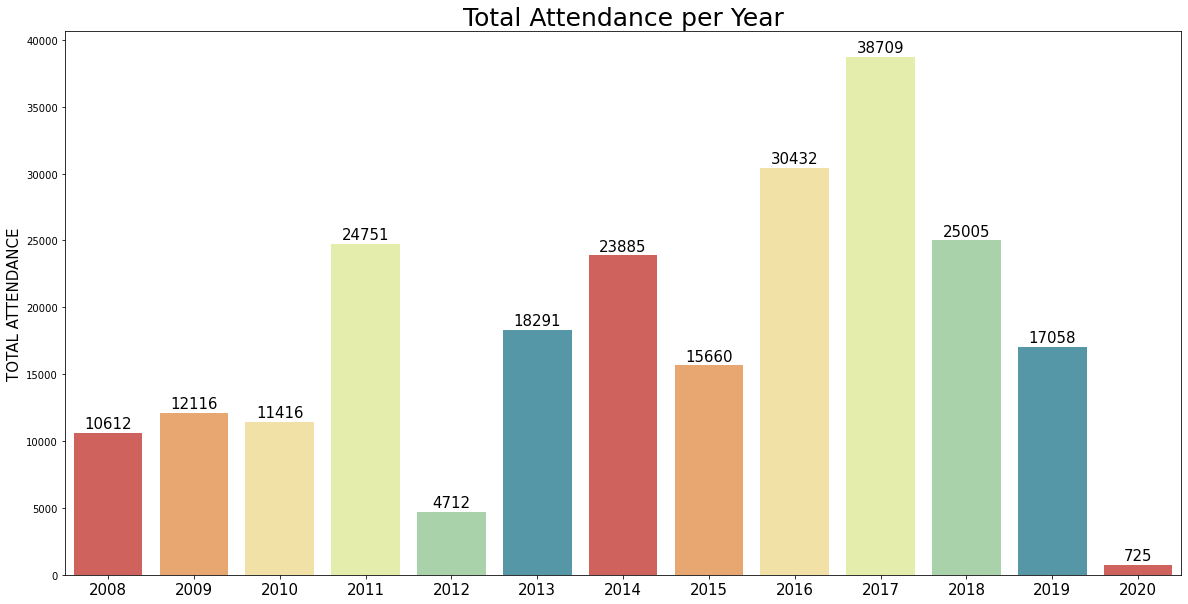

In [39]:
fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("Spectral")

g = sns.barplot(x=attendance_df.index ,y='ATTENDANCE',data=attendance_df, palette=palette)

plt.xticks(ticks = np.arange(0,13, 1), labels = np.arange(2008, 2021, 1), fontsize=15)
plt.ylabel('TOTAL ATTENDANCE',fontsize=15)
plt.title('Total Attendance per Year',fontsize=25)

for index, row in attendance_df.iterrows():
    g.text(row.name, row.ATTENDANCE+350, row.ATTENDANCE, color='black', ha="center", fontsize=15)


plt.show()

In [40]:
# total pay per show per year

pay_show_avg_df = [df_2008['PAY'].sum() / df_2008.count()[0]   ,
        df_2009['PAY'].sum() / df_2009.count()[0]    ,
        df_2010['PAY'].sum() / df_2010.count()[0]    ,
        df_2011['PAY'].sum() / df_2011.count()[0]    ,
        df_2012['PAY'].sum() / df_2012.count()[0]    ,
        df_2013['PAY'].sum() / df_2013.count()[0]    ,
        df_2014['PAY'].sum() / df_2014.count()[0]    ,
        df_2015['PAY'].sum() / df_2015.count()[0]    ,
        df_2016['PAY'].sum() / df_2016.count()[0]    ,
        df_2017['PAY'].sum() / df_2017.count()[0]    ,
        df_2018['PAY'].sum() / df_2018.count()[0]    ,
        df_2019['PAY'].sum() / df_2019.count()[0]    ,
        df_2020['PAY'].sum() /  df_2020.count()[0]       ]

pay_show_avg_df = pd.DataFrame(pay_show_avg_df, columns=['AVG PAY PER SHOW'])

pay_show_avg_df = round(pay_show_avg_df, 2)


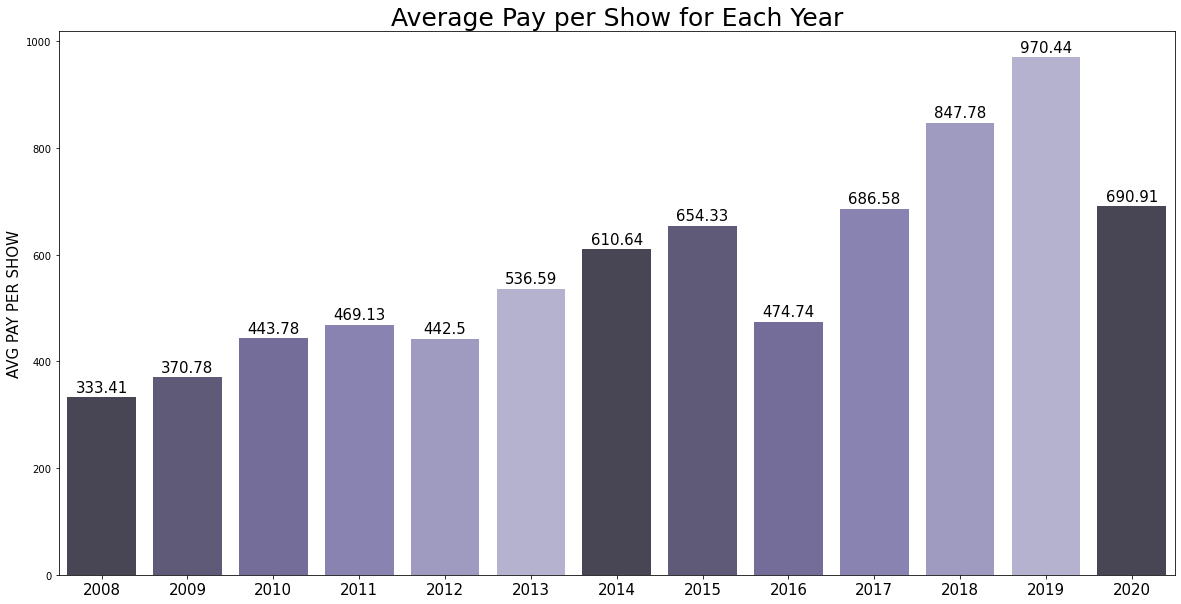

In [41]:
fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("Purples_d")

g = sns.barplot(x=pay_show_avg_df.index ,y='AVG PAY PER SHOW',data=pay_show_avg_df, palette=palette)

plt.xticks(ticks = np.arange(0,13, 1), labels = np.arange(2008, 2021, 1), fontsize=15)
plt.ylabel('AVG PAY PER SHOW',fontsize=15)
plt.title('Average Pay per Show for Each Year',fontsize=25)

for index, row in pay_show_avg_df.iterrows():
    g.text(row.name, row['AVG PAY PER SHOW']+10, row['AVG PAY PER SHOW'], color='black', ha="center", fontsize=15)


plt.show()

In [42]:

att_show_avg_df = [int(round(df_2008['ATTENDANCE'].sum() / df_2008.count()[0]))   ,
        int(round(df_2009['ATTENDANCE'].sum() / df_2009.count()[0] ))   ,
        int(round(df_2010['ATTENDANCE'].sum() / df_2010.count()[0] ))   ,
        int(round(df_2011['ATTENDANCE'].sum() / df_2011.count()[0] ))   ,
        int(round(df_2012['ATTENDANCE'].sum() / df_2012.count()[0] ))   ,
        int(round(df_2013['ATTENDANCE'].sum() / df_2013.count()[0] ))   ,
        int(round(df_2014['ATTENDANCE'].sum() / df_2014.count()[0] ))   ,
        int(round(df_2015['ATTENDANCE'].sum() / df_2015.count()[0] ))   ,
        int(round(df_2016['ATTENDANCE'].sum() / df_2016.count()[0] ))   ,
        int(round(df_2017['ATTENDANCE'].sum() / df_2017.count()[0] ))   ,
        int(round(df_2018['ATTENDANCE'].sum() / df_2018.count()[0] ))   ,
        int(round(df_2019['ATTENDANCE'].sum() / df_2019.count()[0]  ))  ,
        int(round(df_2020['ATTENDANCE'].sum() /  df_2020.count()[0]  ))     ]

att_show_avg_df = pd.DataFrame(att_show_avg_df, columns=['AVG ATTENDANCE PER SHOW'])




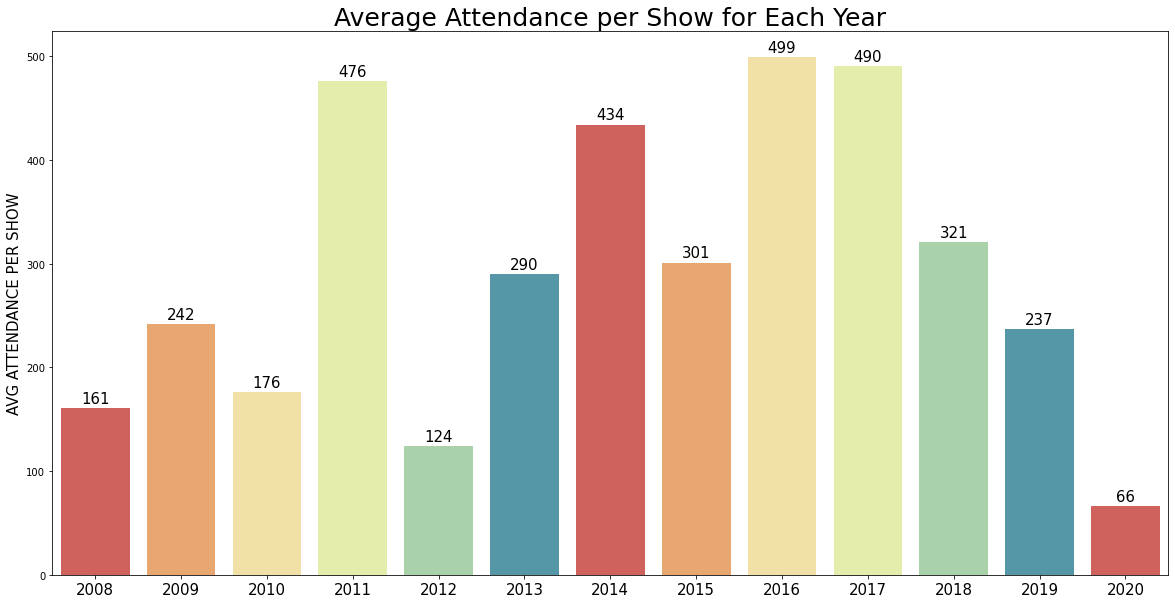

In [43]:
fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("Spectral")

g = sns.barplot(x=att_show_avg_df.index ,y='AVG ATTENDANCE PER SHOW',data=att_show_avg_df, palette=palette)

plt.xticks(ticks = np.arange(0,13, 1), labels = np.arange(2008, 2021, 1), fontsize=15)
plt.ylabel('AVG ATTENDANCE PER SHOW',fontsize=15)
plt.title('Average Attendance per Show for Each Year',fontsize=25)

for index, row in att_show_avg_df.iterrows():
    g.text(row.name, row['AVG ATTENDANCE PER SHOW']+5, row['AVG ATTENDANCE PER SHOW'], color='black', ha="center", fontsize=15)


plt.show()

In [44]:
# seperate months inseperate column


# new data frame with split value columns 

month = df['DATE'].str.split("/", n = 1, expand = True) 

df['MONTH']= month[0] 


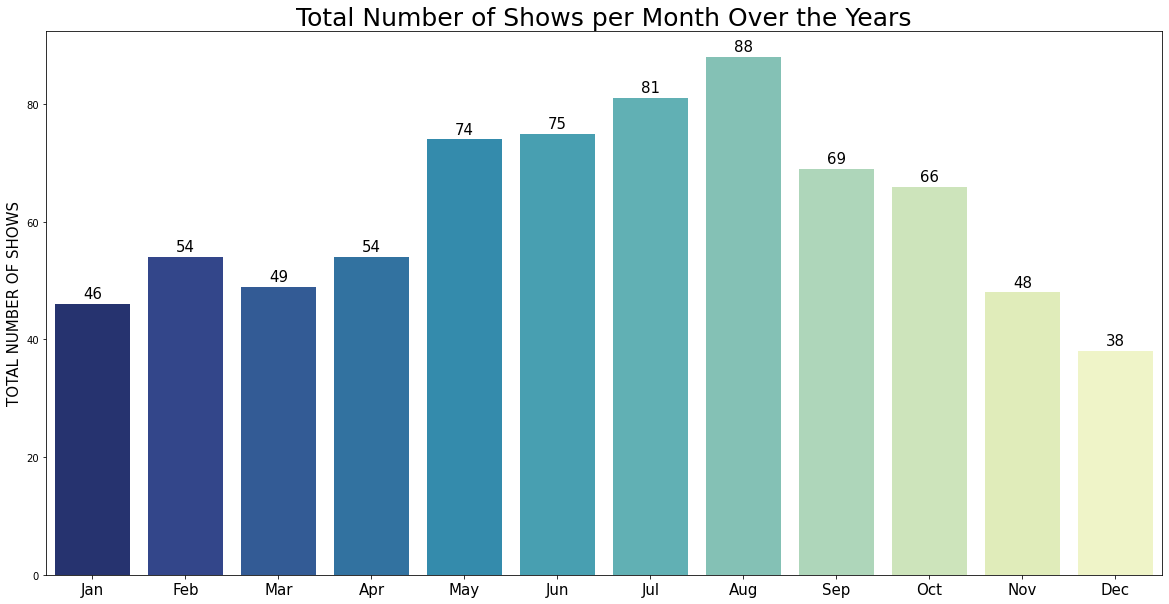

In [45]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

reorderlist = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

count = df.groupby('MONTH').count()
count = count.reindex(reorderlist).reset_index()


fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("YlGnBu_r", 12)

g = sns.barplot(x=count.index ,y='DATE', data=count, palette=palette)


plt.xticks(ticks = np.arange(0,12, 1), labels = months, fontsize=15)
plt.ylabel('TOTAL NUMBER OF SHOWS',fontsize=15)
plt.title('Total Number of Shows per Month Over the Years',fontsize=25)

for index, row in count.iterrows():
    g.text(row.name, row.DATE + 1 , row.DATE, color='black', ha="center", fontsize=15)


plt.show()


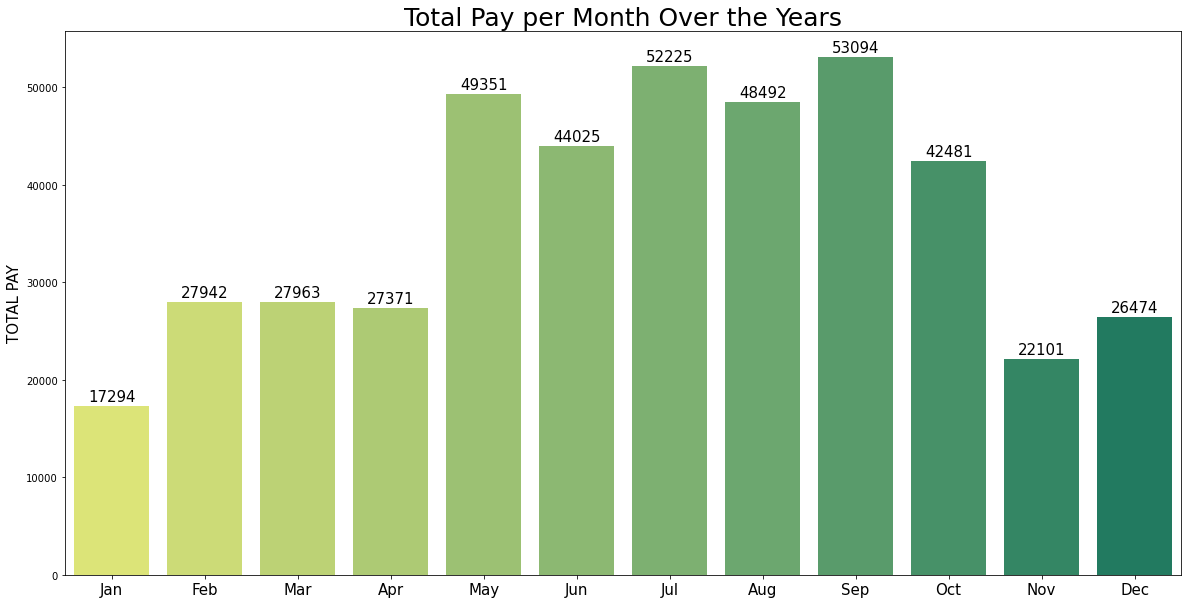

In [46]:

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

reorderlist = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

sums = df.groupby('MONTH').sum()
sums = sums.reindex(reorderlist).reset_index()

fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("summer_r", 12)

g = sns.barplot(x=sums.index ,y='PAY',data=sums, palette=palette)

for index, row in sums.iterrows():
    g.text(row.name, row.PAY + 500 , row.PAY, color='black', ha="center", fontsize=15)

plt.xticks(ticks = np.arange(0,12, 1), labels = months, fontsize=15)
plt.ylabel('TOTAL PAY',fontsize=15)
plt.title('Total Pay per Month Over the Years',fontsize=25)


plt.show()



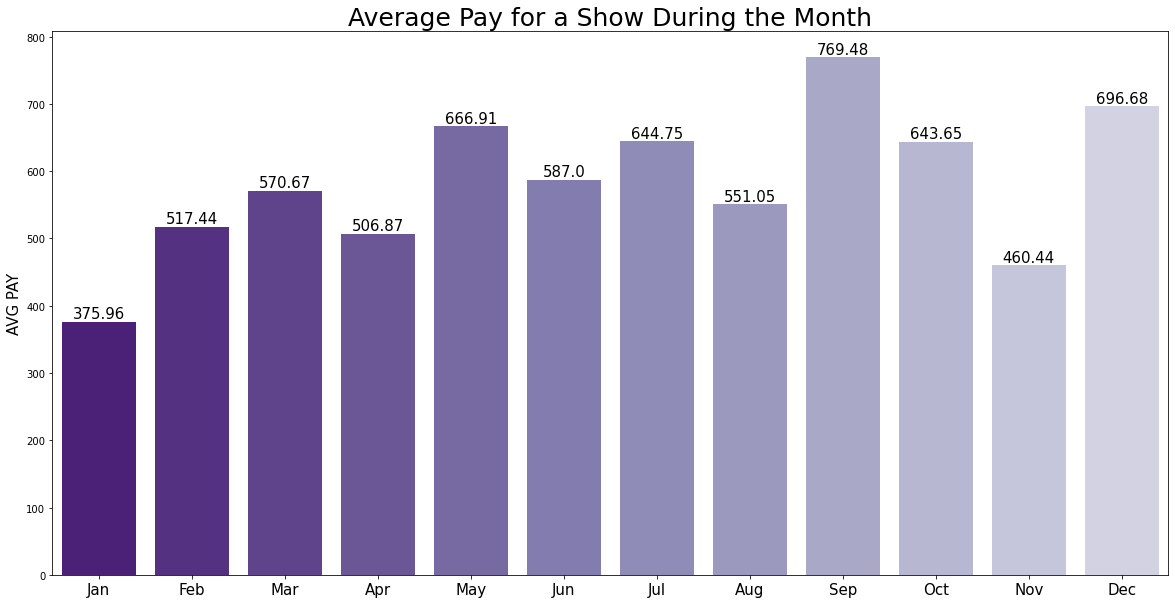

In [47]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

reorderlist = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

means = df.groupby('MONTH').mean()
means = means.reindex(reorderlist).reset_index()


fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("Purples_r", 16)

g = sns.barplot(x=means.index ,y='PAY',data=means, palette=palette)

for index, row in means.iterrows():
    g.text(row.name, row.PAY + 5, round(row.PAY, 2), color='black', ha="center", fontsize=15)

plt.xticks(ticks = np.arange(0,12, 1), labels = months, fontsize=15)
plt.ylabel('AVG PAY',fontsize=15)
plt.title('Average Pay for a Show During the Month',fontsize=25)


plt.show()

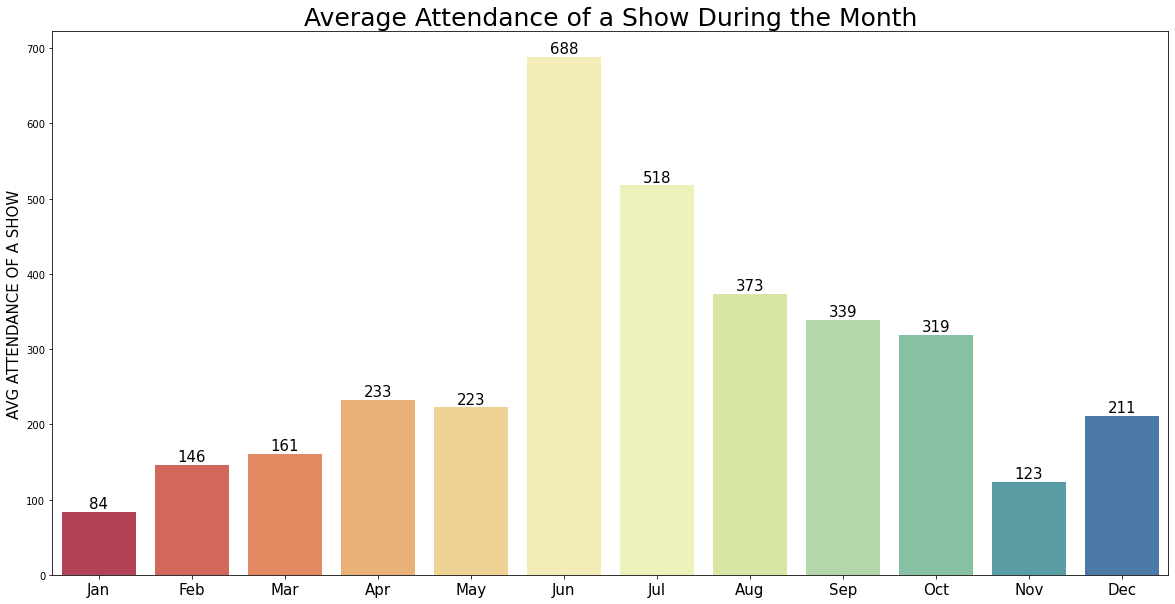

In [48]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

reorderlist = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

means = df.groupby('MONTH').mean()
means = means.reindex(reorderlist).reset_index()


fig = plt.figure(figsize=(20, 10))

palette = sns.color_palette("Spectral", 12)

g = sns.barplot(x=means.index ,y='ATTENDANCE',data=means, palette=palette)

for index, row in means.iterrows():
    g.text(row.name, row.ATTENDANCE + 5, round(row.ATTENDANCE), color='black', ha="center", fontsize=15)

plt.xticks(ticks = np.arange(0,12, 1), labels = months, fontsize=15)
plt.ylabel('AVG ATTENDANCE OF A SHOW',fontsize=15)
plt.title('Average Attendance of a Show During the Month',fontsize=25)




plt.show()